
  # Logistic Regression With Wheather Data

<a class="anchor" id="0.1"></a>
# **Table of Contents**


1.	[Introduction to Logistic Regression](#1)
2.	[Logistic Regression intuition](#2)
3.	[Assumptions of Logistic Regression](#3)
4.	[Types of Logistic Regression](#4)
5.	[Import libraries](#5)
6.	[Import dataset](#6)
7.	[Exploratory data analysis](#7)
8.	[Categorical Variables](#8)
9.	[Continous Variables](#9)
10.	[Missing Values](#10)
11.	[Splitting Data into Training and Test Sets](#11)
12.	[Categorical Features (Feature Engineering)](#12)
13.	[Continuous Features (Feature Engineering)](#13)
14.	[Response Variable](#14)
15.	[Scaling](#15)
16.	[Model Training and Results](#16)
17.	[Confusion matrix](#17)
18.	[Classification metrices](#18)
19.	[ROC - AUC](#19)
20.	[k-Fold Cross Validation](#20)
21.	[Hyperparameter Optimization using GridSearch CV](#21)
22. [Results and conclusion](#22)


# **1. Introduction to Logistic Regression** <a class="anchor" id="1"></a>


[Table of Contents](#0.1)


When data scientists may come across a new classification problem, the first algorithm that may come across their mind is **Logistic Regression**. It is a supervised learning classification algorithm which is used to predict observations to a discrete set of classes. Practically, it is used to classify observations into different categories. Hence, its output is discrete in nature. **Logistic Regression** is also called **Logit Regression**. It is one of the most simple, straightforward and versatile classification algorithms which is used to solve classification problems.

# **2. Logistic Regression intuition** <a class="anchor" id="2"></a>


[Table of Contents](#0.1)


In statistics, the **Logistic Regression model** is a widely used statistical model which is primarily used for classification purposes. It means that given a set of observations, Logistic Regression algorithm helps us to classify these observations into two or more discrete classes. So, the target variable is discrete in nature.


The Logistic Regression algorithm works as follows -

## **Implement linear equation**


Logistic Regression algorithm works by implementing a linear equation with independent or explanatory variables to predict a response value. For example, we consider the example of number of hours studied and probability of passing the exam. Here, number of hours studied is the explanatory variable and it is denoted by x1. Probability of passing the exam is the response or target variable and it is denoted by z.


If we have one explanatory variable (x1) and one response variable (z), then the linear equation would be given mathematically with the following equation-

    z = β0 + β1x1    

Here, the coefficients β0 and β1 are the parameters of the model.


If there are multiple explanatory variables, then the above equation can be extended to

    z = β0 + β1x1+ β2x2+……..+ βnxn
    
Here, the coefficients β0, β1, β2 and βn are the parameters of the model.

So, the predicted response value is given by the above equations and is denoted by z.

## **Sigmoid Function**

This predicted response value, denoted by z is then converted into a probability value that lie between 0 and 1. We use the sigmoid function in order to map predicted values to probability values. This sigmoid function then maps any real value into a probability value between 0 and 1.

In machine learning, sigmoid function is used to map predictions to probabilities. The sigmoid function has an S shaped curve. It is also called sigmoid curve.

A Sigmoid function is a special case of the Logistic function. It is given by the following mathematical formula.

Graphically, we can represent sigmoid function with the following graph.

### Sigmoid Function

![Sigmoid Function](https://miro.medium.com/max/970/1*Xu7B5y9gp0iL5ooBj7LtWw.png)

## **Decision boundary**

The sigmoid function returns a probability value between 0 and 1. This probability value is then mapped to a discrete class which is either “0” or “1”. In order to map this probability value to a discrete class (pass/fail, yes/no, true/false), we select a threshold value. This threshold value is called Decision boundary. Above this threshold value, we will map the probability values into class 1 and below which we will map values into class 0.

Mathematically, it can be expressed as follows:-

p ≥ 0.5 => class = 1

p < 0.5 => class = 0 

Generally, the decision boundary is set to 0.5. So, if the probability value is 0.8 (> 0.5), we will map this observation to class 1. Similarly, if the probability value is 0.2 (< 0.5), we will map this observation to class 0. This is represented in the graph below-

![Decision boundary in sigmoid function](https://ml-cheatsheet.readthedocs.io/en/latest/_images/logistic_regression_sigmoid_w_threshold.png)

## **Making predictions**

Now, we know about sigmoid function and decision boundary in logistic regression. We can use our knowledge of sigmoid function and decision boundary to write a prediction function. A prediction function in logistic regression returns the probability of the observation being positive, Yes or True. We call this as class 1 and it is denoted by P(class = 1). If the probability inches closer to one, then we will be more confident about our model that the observation is in class 1, otherwise it is in class 0.


# **3. Assumptions of Logistic Regression** <a class="anchor" id="3"></a>


[Table of Contents](#0.1)


The Logistic Regression model requires several key assumptions. These are as follows:-

1. Logistic Regression model requires the dependent variable to be binary, multinomial or ordinal in nature.

2. It requires the observations to be independent of each other. So, the observations should not come from repeated measurements.

3. Logistic Regression algorithm requires little or no multicollinearity among the independent variables. It means that the independent variables should not be too highly correlated with each other.

4. Logistic Regression model assumes linearity of independent variables and log odds.

5. The success of Logistic Regression model depends on the sample sizes. Typically, it requires a large sample size to achieve the high accuracy.

# **4. Types of Logistic Regression** <a class="anchor" id="4"></a>


[Table of Contents](#0.1)


Logistic Regression model can be classified into three groups based on the target variable categories. These three groups are described below:-

### 1. Binary Logistic Regression

In Binary Logistic Regression, the target variable has two possible categories. The common examples of categories are yes or no, good or bad, true or false, spam or no spam and pass or fail.


### 2. Multinomial Logistic Regression

In Multinomial Logistic Regression, the target variable has three or more categories which are not in any particular order. So, there are three or more nominal categories. The examples include the type of categories of fruits - apple, mango, orange and banana.


### 3. Ordinal Logistic Regression

In Ordinal Logistic Regression, the target variable has three or more ordinal categories. So, there is intrinsic order involved with the categories. For example, the student performance can be categorized as poor, average, good and excellent.


# **5. Import libraries** <a class="anchor" id="5"></a>


[Table of Contents](#0.1)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# **6. Import dataset** <a class="anchor" id="6"></a>


[Table of Contents](#0.1)

In [2]:
data = pd.read_csv('weatherAUS.csv')

# **7. Exploratory data analysis** <a class="anchor" id="7"></a>


[Table of Contents](#0.1)


Now, I will explore the data to gain insights about the data. 

In [3]:
# Dataframe Dimensions: How many rows and columns are there?
data = data.copy()
data.shape

(145460, 23)

We see that there are a little under 150,000 rows in 23 columns. Lets take a sneak peek at the data:

In [4]:
data.head().T

,0,1,2,3,4
Date,2008-12-01,2008-12-02,2008-12-03,2008-12-04,2008-12-05
Location,Albury,Albury,Albury,Albury,Albury
MinTemp,13.4,7.4,12.9,9.2,17.5
MaxTemp,22.9,25.1,25.7,28,32.3
Rainfall,0.6,0,0,0,1
Evaporation,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustDir,W,WNW,WSW,NE,W
WindGustSpeed,44,44,46,24,41
WindDir9am,W,NNW,W,SE,ENE


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

# **8. Categorical Variables** <a class="anchor" id="7"></a>
Lets take a quick look at our categorical variables

[Table of Contents](#0.1)


In [6]:
# Unique values in categorical variables
cat_col = data.select_dtypes(include=['object'])
cat_col.nunique()

Date            3436
Location          49
WindGustDir       16
WindDir9am        16
WindDir3pm        16
RainToday          2
RainTomorrow       2
dtype: int64

It seems like there's a pre-defined set of directions (16 unique values) for columns pertaining to wind direction. There are also two dummy variables for `RainToday` and `RainTomorrow`. Lastly, there are 49 unique values in `Location`, which is assumed to be all in Australia. 

The `Date` column also has a high number of unique values, which is something that will need to be adjusted before it goes into any model. Any columns with high cardinality will require some type of pre

In [7]:
data['Location'].value_counts()

Canberra            3436
Sydney              3344
Perth               3193
Hobart              3193
Darwin              3193
Brisbane            3193
Melbourne           3193
Adelaide            3193
MountGambier        3040
Ballarat            3040
Townsville          3040
MountGinini         3040
Wollongong          3040
Albany              3040
Bendigo             3040
Albury              3040
Launceston          3040
AliceSprings        3040
Cairns              3040
GoldCoast           3040
Newcastle           3039
Penrith             3039
Tuggeranong         3039
Cobar               3009
Richmond            3009
WaggaWagga          3009
Nuriootpa           3009
Williamtown         3009
PearceRAAF          3009
Woomera             3009
Moree               3009
Watsonia            3009
Sale                3009
PerthAirport        3009
CoffsHarbour        3009
Dartmoor            3009
SydneyAirport       3009
Portland            3009
Witchcliffe         3009
MelbourneAirport    3009


The `Location` column does not seem to have a huge issue, although we will have to do more digging to see. 

`RainTomorrow` will be the response variable, as that is the column we are trying to predict.

## Problems with Categorical Variables

Before doing any feature engineering, lets look at the number of missing values in the categorical columns


In [8]:
cat_col.isna().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

There seems to be a (relatively) high number of missing values in `WindGustDir` and `WindDir9am`. We will deal with these afterwards. For now, we see that there are no missing values with `Date`, which is a good sign for our next steps in feature engineering.

## `Date` Column

As mentioned, we want to do some feature engineering to lower the cardinality of the `Date` column. It seems reasonable to break the `Date` column down into:
* `Year`
* `Month`
* `Day`

In [9]:
# Breaking down date column to Year, Month and Date

data['Date'] = pd.to_datetime(data['Date']) # parse as datatime

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

data[['Date', 'Year', 'Month', 'Day']] # preview changes made

data.drop('Date', axis=1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

## `Location` Column

In [10]:
# Unique Values
print(data['Location'].value_counts())
print("")
print("")
print(f"Missing Values: {data['Location'].isna().sum()}")

Canberra            3436
Sydney              3344
Perth               3193
Hobart              3193
Darwin              3193
Brisbane            3193
Melbourne           3193
Adelaide            3193
MountGambier        3040
Ballarat            3040
Townsville          3040
MountGinini         3040
Wollongong          3040
Albany              3040
Bendigo             3040
Albury              3040
Launceston          3040
AliceSprings        3040
Cairns              3040
GoldCoast           3040
Newcastle           3039
Penrith             3039
Tuggeranong         3039
Cobar               3009
Richmond            3009
WaggaWagga          3009
Nuriootpa           3009
Williamtown         3009
PearceRAAF          3009
Woomera             3009
Moree               3009
Watsonia            3009
Sale                3009
PerthAirport        3009
CoffsHarbour        3009
Dartmoor            3009
SydneyAirport       3009
Portland            3009
Witchcliffe         3009
MelbourneAirport    3009


The distribution of these value counts are quite nice. It seems that all we need to do is to capture this data using dummy variables. The best way to do this is to employ One-Hot Encoding

In [11]:
# One Hot Encoding (Preview) for Location column
pd.get_dummies(data.Location, drop_first=True).head() # 'drop first' means that we drop the first value if everything else is 0

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


What we have now is 48 columns that represent our `Location` column. Instead of having one column that explains what location the data is from, now we have a dummy variable that represents this. This means that in every row of data, only one row will have a $1$ that denotes where the `Location` is. Additionally, if everything is $0$, this means that it is referring to 'Albany'. See [here](https://www.dataindependent.com/pandas/pandas-get-dummies/) for more information on `drop_first = True` parameter.

## `WindGustDir` Column

In [12]:
# Unique Values
print(data['WindGustDir'].value_counts())
print("")
print("")
print(f"Missing Values: {data['WindGustDir'].isna().sum()}")

W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64


Missing Values: 10326


We can employ the same type of One-Hot encoding, but implement an additional value `NaN` for missing values. The reason why we are doing this is because we are not sure why there are missing values. It is best to leave it in. 

In [13]:
# One-Hot Encoding (Preview) of 'WindGustDir'

pd.get_dummies(data.WindGustDir, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## `WindDir9am` Column

In [14]:
# Unique Values
print(data['WindDir9am'].value_counts())
print("")
print("")
print(f"Missing Values: {data['WindDir9am'].isna().sum()}")

N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64


Missing Values: 10566


This is quite similar to our previous column, where we should employ One-Hot encoding while taking missing values into account.

In [15]:
# One Hot Encoding (Preview) for WindDir9am column

pd.get_dummies(data.WindDir9am, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## `WindDir3pm` Column

In [16]:
# Unique Values
print(data['WindDir3pm'].value_counts())
print("")
print("")
print(f"Missing Values: {data['WindDir3pm'].isna().sum()}")

SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: WindDir3pm, dtype: int64


Missing Values: 4228


A little less missing values compared to the previous few columns. Lets apply the same type of encoding as well.

In [17]:
# One Hot Encoding (Preview) for WindDir3pm column

pd.get_dummies(data.WindDir3pm, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


## `RainToday` Column

In [18]:
print(data['RainToday'].value_counts())
print("")
print("")
print(f"Missing Values: {data['RainToday'].isna().sum()}")

No     110319
Yes     31880
Name: RainToday, dtype: int64


Missing Values: 3261


Based on the same thought process, it is best to do One-Hot Encoding.

In [19]:
pd.get_dummies(data.RainToday, drop_first=True, dummy_na=True).head()

,Yes,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


# **9. Continous Variables** <a class="anchor" id="7"></a>

[Table of Contents](#0.1)

Now, lets look at the continous variables.


In [20]:
# Missing Values

var_data = data.select_dtypes(include=['float64'])
var_data.isna().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

In [21]:
# Continuous variables

var_data = data.select_dtypes(include=['float64'])
var_data.describe().apply(round) # round the data to first decimal place

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.0,144199.0,142199.0,82670.0,75625.0,135197.0,143693.0,142398.0,142806.0,140953.0,130395.0,130432.0,89572.0,86102.0,143693.0,141851.0
mean,12.0,23.0,2.0,5.0,8.0,40.0,14.0,19.0,69.0,52.0,1018.0,1015.0,4.0,5.0,17.0,22.0
std,6.0,7.0,8.0,4.0,4.0,14.0,9.0,9.0,19.0,21.0,7.0,7.0,3.0,3.0,6.0,7.0
min,-8.0,-5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,980.0,977.0,0.0,0.0,-7.0,-5.0
25%,8.0,18.0,0.0,3.0,5.0,31.0,7.0,13.0,57.0,37.0,1013.0,1010.0,1.0,2.0,12.0,17.0
50%,12.0,23.0,0.0,5.0,8.0,39.0,13.0,19.0,70.0,52.0,1018.0,1015.0,5.0,5.0,17.0,21.0
75%,17.0,28.0,1.0,7.0,11.0,48.0,19.0,24.0,83.0,66.0,1022.0,1020.0,7.0,7.0,22.0,26.0
max,34.0,48.0,371.0,145.0,14.0,135.0,130.0,87.0,100.0,100.0,1041.0,1040.0,9.0,9.0,40.0,47.0


Based on the table above, there may be outliers in `Rainfall`, `Evaporation`,`Windspeed9am` and `Windspeed3pm`. This is inferred from the difference between the row `max` and the other rows, and how far it is away from `75%`. Lets visualize this to further explore this intuition.

## Outliers in `Rainfall`, `Evaporation`, `Windspeed9am`, `Windspeed3pm` 


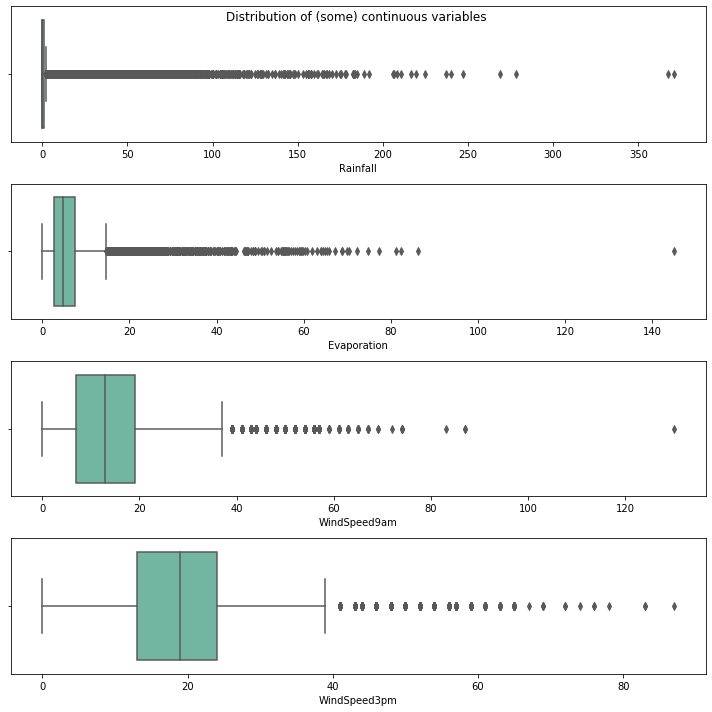

In [22]:
fig, axes = plt.subplots(4,1, figsize=(10, 10), sharey=False)
fig.suptitle('Distribution of (some) continuous variables')

# Rainfall
sns.boxplot(x= 'Rainfall', data = data, palette = 'Set2', ax = axes[0])
axes[0].set_title("")

# Evaporation
sns.boxplot(x= 'Evaporation', data = data, palette = 'Set2', ax = axes[1])
axes[1].set_title("")

# Windspeed (9AM)
sns.boxplot(x= 'WindSpeed9am', data = data, palette = 'Set2', ax = axes[2])
axes[2].set_title("")

# Windspeed (3PM)
sns.boxplot(x= 'WindSpeed3pm', data = data, palette = 'Set2', ax = axes[3])
axes[3].set_title("")

plt.tight_layout()

In fact, there are a lot of outliers in these four columns. Before removing any outliers, I should check how these columns are distributed. Any type of drastic skew will change the way I remove these outliers.

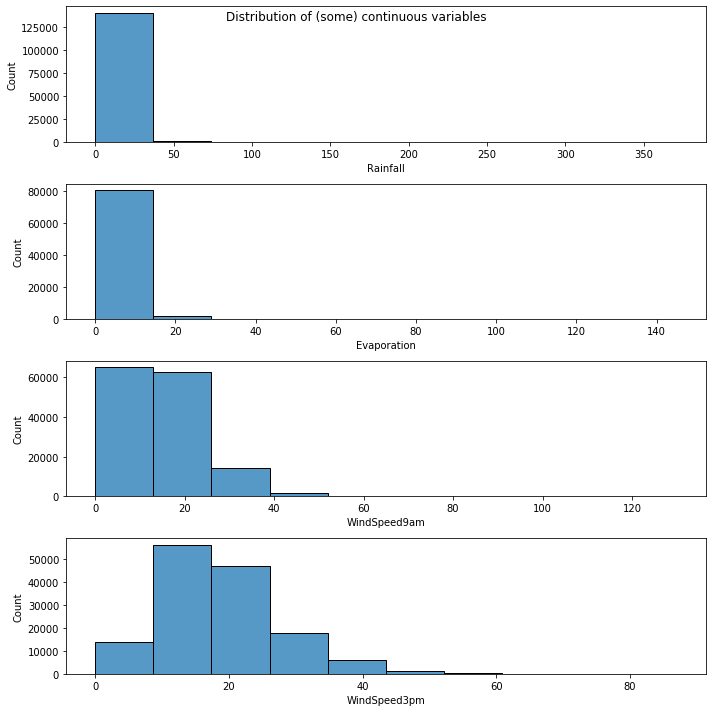

In [23]:
fig, axes = plt.subplots(4,1, figsize=(10, 10), sharey=False)
fig.suptitle('Distribution of (some) continuous variables')

# Rainfall
sns.histplot(x= 'Rainfall', data = data, palette = 'Set2', ax = axes[0], bins = 10)
axes[0].set_title("")

# Evaporation
sns.histplot(x= 'Evaporation', data = data, palette = 'Set2', ax = axes[1], bins = 10)
axes[1].set_title("")

# Windspeed (9AM)
sns.histplot(x= 'WindSpeed9am', data = data, palette = 'Set2', ax = axes[2], bins = 10)
axes[2].set_title("")

# Windspeed (3PM)
sns.histplot(x= 'WindSpeed3pm', data = data, palette = 'Set2', ax = axes[3], bins = 10)
axes[3].set_title("")

plt.tight_layout()

All four of these columns are heavily right-skewed, so we should employ a way to remove outliers using the IQR range.

In [24]:
# Calculating IQR, Upper and Lower bounds for all four columns

for column in ['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm']:
    IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
    Lower_fence = data[column].quantile(0.25) - (IQR * 3)
    Upper_fence = data[column].quantile(0.75) + (IQR * 3)
    print(f'{column} outliers are values < {round(Lower_fence,2)} or > {round(Upper_fence,2)}')

Rainfall outliers are values < -2.4 or > 3.2
Evaporation outliers are values < -11.8 or > 21.8
WindSpeed9am outliers are values < -29.0 or > 55.0
WindSpeed3pm outliers are values < -20.0 or > 57.0


Lets look at a recap of all our columns, and what we are going to do with each one:

`Date` - turn into ‘year’, ‘month’, ‘day’\
`Location` - one-hot encoding, drop first, no missing data\
`MinTemp` - \
`MaxTemp`\
`Rainfall` - remove outliers < -2.4 or > 3.2\
`Evaporation` - remove outliers < -11.8 or > 21.8\
`Sunshine`\
`WindGustDir` - one-hot encoding, drop first, NaN for missing data\
`WindGustSpeed`\
`WindDir9am` - one-hot encoding, drop first, NaN for missing data\
`WindDir3pm` - one-hot encoding, drop first, NaN for missing data\
`WindSpeed9am` - remove outliers < -29.0 or > 55.0\
`WindSpeed3pm` - remove outliers < -20.0 or > 57.0\
`Humidity9am`\
`Humidity3pm`\
`Pressure9am`\
`Pressure3pm`\
`Cloud9am`\
`Cloud3pm`\
`Temp9am`\
`Temp3pm`\
`RainToday` - one-hot encoding, drop first, NaN for missing data\
`RainTomorrow`\
\
Now, we need to deal with the missing values.

# **10. Missing Values** <a class="anchor" id="7"></a>


[Table of Contents](#0.1)


For this dataset, it is fair to assume that the missing values are missing at random. (MCAR, Missing Completely At Random). This means that we can either impute the missing values with the mean value or the median value. Because we have shown that this dataset is prone to outliers, inputing the missing values with the median value seems to be a better approach. 

We should only be filling in these missing values over the training dataset and not the train dataset, so lets split the data first and apply these measures along with all the other things listed in sections 2 and 3.

Regarding the response variable,it's not certain why we have missing response variable data. Because of this reason, we should be wary of simply coding them as the mode or something similar. Deleting them completely may also be a risk, as it can introduce bias. However, that may be the best solution we have for now.

In [25]:
print(f"Number of missing values in response variable: {data['RainTomorrow'].isna().sum()}")

data = data.dropna(subset = ['RainTomorrow'])

print(f"Number of missing values in response variable after dropping NA values: {data['RainTomorrow'].isna().sum()}")

Number of missing values in response variable: 3267
Number of missing values in response variable after dropping NA values: 0


# **11. Splitting Data into Training and Test Sets** <a class="anchor" id="7"></a>

[Table of Contents](#0.1)



In [26]:
from sklearn.model_selection import train_test_split

X = data.drop(['RainTomorrow'], axis = 1)
y = data['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(f"The training sets have the following shapes: {X_train.shape, y_train.shape}")
print(f"The testing sets have the following shapes: {X_test.shape, y_test.shape}")

The training sets have the following shapes: ((113754, 24), (113754,))
The testing sets have the following shapes: ((28439, 24), (28439,))


# **12.Categorical Features (Feature Engineering)** <a class="anchor" id="7"></a>


[Table of Contents](#0.1)

In [27]:
# Listing out categorical columns and their missing values
# This doesn't include 'Year', 'Month', and 'Day' because they're integers

categorical_cols = list(X_train.select_dtypes(include=['object']).columns)
X_train[categorical_cols].isna().sum()

Location          0
WindGustDir    7407
WindDir9am     7978
WindDir3pm     3008
RainToday      1139
dtype: int64

In [28]:
# Filling in missing values in X_train with the mode.
for i in categorical_cols:
    X_train[i].fillna(X_train[i].mode()[0], inplace=True)
    X_test[i].fillna(X_test[i].mode()[0], inplace=True)
    
# Checking missing values in X_train
X_train[categorical_cols].isna().sum()

/home/ssauto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [29]:
# Checking missing values in X_test
X_test[categorical_cols].isna().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [30]:
# Encoding categorical variables
import category_encoders as ce

onehotencoder = ce.BinaryEncoder(cols=['RainToday'])
X_train = onehotencoder.fit_transform(X_train)
X_test = onehotencoder.fit_transform(X_test)

X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
113462,Witchcliffe,13.9,22.6,0.2,NaN,NaN,S,41.0,SSE,S,...,1013.4,NaN,NaN,18.8,20.4,0,1,2014,4,25
89638,Cairns,22.4,29.4,2.0,6.0,6.3,ENE,33.0,SSE,SE,...,1013.1,7.0,5.0,26.4,27.5,1,0,2015,11,2
138130,AliceSprings,9.7,36.2,0.0,11.4,12.3,E,31.0,NE,N,...,1013.6,1.0,1.0,28.5,35.0,0,1,2014,10,19
87898,Cairns,20.5,30.1,0.0,8.8,11.1,ESE,37.0,SSE,E,...,1010.8,2.0,3.0,27.3,29.4,0,1,2010,10,30
16484,Newcastle,16.8,29.2,0.0,NaN,NaN,W,NaN,N,SE,...,NaN,5.0,8.0,22.2,27.0,0,1,2012,11,8


Note that the binary encoder has created an additional column: `RainToday_0` and `RainToday_1`. 

# **13.Continuous Features (Feature Engineering)** <a class="anchor" id="7"></a>


[Table of Contents](#0.1)

In [31]:
continuous_cols = list(X_train.select_dtypes(include=['float64']).columns)
X_train[continuous_cols].isna().sum()

MinTemp            495
MaxTemp            264
Rainfall          1139
Evaporation      48718
Sunshine         54314
WindGustSpeed     7367
WindSpeed9am      1086
WindSpeed3pm      2094
Humidity9am       1449
Humidity3pm       2890
Pressure9am      11212
Pressure3pm      11186
Cloud9am         43137
Cloud3pm         45768
Temp9am            740
Temp3pm           2171
dtype: int64

In [32]:
# Fill in missing values with median

for column in continuous_cols:
    X_train[column].fillna(X_train[column].median(), inplace = True)
    X_test[column].fillna(X_test[column].median(), inplace = True)
    
# Checking missing values 
X_train.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday_0      0
RainToday_1      0
Year             0
Month            0
Day              0
dtype: int64

In [33]:
# Checking missing values 
X_test.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday_0      0
RainToday_1      0
Year             0
Month            0
Day              0
dtype: int64

In [34]:
# Removing outliers in certain continous columns
def upper_outlier(df, variable, top):
    return np.where(df[variable]>top, top, df[variable])
def lower_outlier(df, variable, bot):
    return np.where(df[variable]<bot, bot, df[variable])

for X_df in [X_train, X_test]:
    X_df['Rainfall'] = upper_outlier(X_df, 'Rainfall', 3.2)
    X_df['Rainfall'] = lower_outlier(X_df, 'Rainfall', -2.4)
    
    X_df['Evaporation'] = upper_outlier(X_df, 'Evaporation', 21.8)
    X_df['Evaporation'] = lower_outlier(X_df, 'Evaporation', -11.8)

    X_df['WindSpeed9am'] = upper_outlier(X_df, 'WindSpeed9am', 55.0)
    X_df['WindSpeed9am'] = lower_outlier(X_df, 'WindSpeed9am', -29.0)

    X_df['WindSpeed3pm'] = upper_outlier(X_df, 'WindSpeed3pm', 57.0)
    X_df['WindSpeed3pm'] = lower_outlier(X_df, 'WindSpeed3pm', -20.0)

X_train.describe().apply(round)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
count,113754.0,113754.0,113754.0,113754.0,113754.0,113754.0,113754.0,113754.0,113754.0,113754.0,...,113754.0,113754.0,113754.0,113754.0,113754.0,113754.0,113754.0,113754.0,113754.0,113754.0
mean,12.0,23.0,1.0,5.0,8.0,40.0,14.0,19.0,69.0,52.0,...,1015.0,5.0,5.0,17.0,22.0,0.0,1.0,2013.0,6.0,16.0
std,6.0,7.0,1.0,3.0,3.0,13.0,9.0,9.0,19.0,21.0,...,7.0,2.0,2.0,6.0,7.0,0.0,0.0,3.0,3.0,9.0
min,-8.0,-5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,...,977.0,0.0,0.0,-7.0,-5.0,0.0,0.0,2007.0,1.0,1.0
25%,8.0,18.0,0.0,4.0,8.0,31.0,7.0,13.0,57.0,37.0,...,1011.0,3.0,4.0,12.0,17.0,0.0,1.0,2011.0,3.0,8.0
50%,12.0,23.0,0.0,5.0,8.0,39.0,13.0,19.0,70.0,52.0,...,1015.0,5.0,5.0,17.0,21.0,0.0,1.0,2013.0,6.0,16.0
75%,17.0,28.0,1.0,5.0,9.0,46.0,19.0,24.0,83.0,65.0,...,1019.0,6.0,6.0,22.0,26.0,0.0,1.0,2015.0,9.0,23.0
max,34.0,48.0,3.0,22.0,14.0,135.0,55.0,57.0,100.0,100.0,...,1040.0,9.0,8.0,40.0,47.0,1.0,1.0,2017.0,12.0,31.0


In [35]:
# Include the other columns that are to be encoded (outlined above)

X_train = pd.concat([X_train[continuous_cols], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir, prefix = 'WGD'),
                     pd.get_dummies(X_train.WindDir9am, prefix = 'WD9am'),
                     pd.get_dummies(X_train.WindDir3pm, prefix = 'WD3pm')], axis=1)

X_test = pd.concat([X_test[continuous_cols], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir, prefix = 'WGD'),
                     pd.get_dummies(X_test.WindDir9am, prefix = 'WD9am'),
                     pd.get_dummies(X_test.WindDir3pm, prefix = 'WD3pm')], axis=1)

# **14. Response Variable** <a class="anchor" id="7"></a>


[Table of Contents](#0.1)

In [36]:
y_test.isna().sum()

0

In [37]:
y_train.isna().sum()

0

At this point, it's not certain why we have missing data. Because of this reason, we should be wary of simply coding them as the mode or something similar. Deleting them completely may also be a risk, as it can introduce bias. However, that may be the best solution we have for now.

# **15. Scaling** <a class="anchor" id="7"></a>


[Table of Contents](#0.1)

In [38]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WD3pm_NNW,WD3pm_NW,WD3pm_S,WD3pm_SE,WD3pm_SSE,WD3pm_SSW,WD3pm_SW,WD3pm_W,WD3pm_WNW,WD3pm_WSW
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,...,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,12.193497,23.237216,0.675080,5.151606,8.041154,39.884074,13.978155,18.614756,68.867486,51.509547,...,0.054530,0.060288,0.067259,0.101605,0.064059,0.056402,0.064464,0.069334,0.060798,0.065483
std,6.388279,7.094149,1.183837,2.823707,2.769480,13.116959,8.806558,8.685862,18.935587,20.530723,...,0.227061,0.238021,0.250471,0.302130,0.244860,0.230698,0.245578,0.254022,0.238960,0.247378
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.600000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,33.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
# Scaling using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

cols = list(X_train.columns)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=[cols])

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=[cols])

X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WD3pm_NNW,WD3pm_NW,WD3pm_S,WD3pm_SE,WD3pm_SSE,WD3pm_SSW,WD3pm_SW,WD3pm_W,WD3pm_WNW,WD3pm_WSW
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,...,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,0.484406,0.530004,0.210962,0.236312,0.554562,0.262667,0.254148,0.326575,0.688675,0.515095,...,0.054530,0.060288,0.067259,0.101605,0.064059,0.056402,0.064464,0.069334,0.060798,0.065483
std,0.151741,0.134105,0.369949,0.129528,0.190999,0.101682,0.160119,0.152384,0.189356,0.205307,...,0.227061,0.238021,0.250471,0.302130,0.244860,0.230698,0.245578,0.254022,0.238960,0.247378
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375297,0.431002,0.000000,0.183486,0.565517,0.193798,0.127273,0.228070,0.570000,0.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.479810,0.517958,0.000000,0.220183,0.586207,0.255814,0.236364,0.333333,0.700000,0.520000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.593824,0.623819,0.187500,0.247706,0.600000,0.310078,0.345455,0.421053,0.830000,0.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WD3pm_NNW,WD3pm_NW,WD3pm_S,WD3pm_SE,WD3pm_SSE,WD3pm_SSW,WD3pm_SW,WD3pm_W,WD3pm_WNW,WD3pm_WSW
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,...,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,0.484406,0.530004,0.210962,0.236312,0.554562,0.262667,0.254148,0.326575,0.688675,0.515095,...,0.054530,0.060288,0.067259,0.101605,0.064059,0.056402,0.064464,0.069334,0.060798,0.065483
std,0.151741,0.134105,0.369949,0.129528,0.190999,0.101682,0.160119,0.152384,0.189356,0.205307,...,0.227061,0.238021,0.250471,0.302130,0.244860,0.230698,0.245578,0.254022,0.238960,0.247378
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375297,0.431002,0.000000,0.183486,0.565517,0.193798,0.127273,0.228070,0.570000,0.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.479810,0.517958,0.000000,0.220183,0.586207,0.255814,0.236364,0.333333,0.700000,0.520000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.593824,0.623819,0.187500,0.247706,0.600000,0.310078,0.345455,0.421053,0.830000,0.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **16. Model Training and Results** <a class="anchor" id="7"></a>

[Table of Contents](#0.1)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initiatlize the model
logreg = LogisticRegression(solver='liblinear', random_state = 0)

# Fit the model
logreg.fit(X_train, y_train)

# Predict data points 
y_pred_test = logreg.predict(X_test)

# Print accuracy scores
print(f'Model accuracy score: {round(accuracy_score(y_test, y_pred_test) * 100, 2)}%')


Model accuracy score: 84.99%


This model accuracy is quite high, although we cannot make any inferences from this yet. For example, this might be a high score because our model is overfitting. We should not only test for overfitting, but also compare this to the null accuracy (when the model predicts the most frequent class)

In [42]:
# Additional Metrics

print(f'Training set score: {round(logreg.score(X_train, y_train) * 100, 2)}%')
print(f'Test set score: {round(logreg.score(X_test, y_test) * 100, 2)}%')

# Calculating null accuracy
null_accuracy = (y_test.value_counts()[0]/(y_test.value_counts()[0]+y_test.value_counts()[1]))
print(f'Null Accuracy score: {round(null_accuracy * 100, 2)}%')

Training set score: 84.73%
Test set score: 84.99%
Null Accuracy score: 77.59%


The null accuracy is significantly lower than that of our model, which is a great sign - it means that our model is better than if we predicted the most popular class every time. In other words, our model is better than nothing!

The training and test set are quite comparable, which means that there are little signs of overfitting. I may want to consider increasing the value of $C$ for a more flexible model.

In [43]:
# Initiatlize the model with C=100
logreg_c100 = LogisticRegression(C=100, solver='liblinear', random_state = 0)

# Fit the model
logreg_c100.fit(X_train, y_train)

print(f'Training set score: {round(logreg_c100.score(X_train, y_train) * 100, 2)}%')
print(f'Test set score: {round(logreg_c100.score(X_test, y_test) * 100, 2)}%')

Training set score: 84.75%
Test set score: 85.01%


Increasing $C$ doesn't seem to have a large impact. I recognize that employing a hyperparamter optimization technique here will help me find an ideal $C$ value.

# **17. Confusion matrix** <a class="anchor" id="15"></a>


[Table of Contents](#0.1)


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.


In [44]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[20905  1162]
 [ 3106  3266]]

True Positives(TP) =  20905

True Negatives(TN) =  3266

False Positives(FP) =  1162

False Negatives(FN) =  3106


The confusion matrix shows `20905 + 3266 = 24171 correct predictions` and `3106 + 1162 = 4268 incorrect predictions`.


In this case, we have


- `True Positives` (Actual Positive:1 and Predict Positive:1) - 20905


- `True Negatives` (Actual Negative:0 and Predict Negative:0) - 3266


- `False Positives` (Actual Negative:0 but Predict Positive:1) - 1162 `(Type I error)`


- `False Negatives` (Actual Positive:1 but Predict Negative:0) - 3106 `(Type II error)`

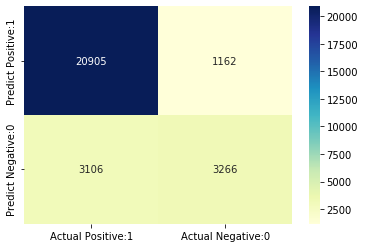

In [45]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# **18. Classification metrices** <a class="anchor" id="16"></a>


[Table of Contents](#0.1)

## Classification Report


**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.87      0.95      0.91     22067
         Yes       0.74      0.51      0.60      6372

    accuracy                           0.85     28439
   macro avg       0.80      0.73      0.76     28439
weighted avg       0.84      0.85      0.84     28439



The classification report provides a great summary of our model. The precision is the proportion of correctly predicted positive outcomes; the Recall is the proportion of correctly predicted actual positives; F1 score is the harmonic mean of precision and r ecall. Because we're only using one model, the F1 score is quite irrelevant in this case. 

Overall, I'm quite happy with the results. The model has a model accuracy score of 85%, which means that it is an adequate model in predicting the raining status of given locations in Australia. Luckily, it seems that the model is predicting 'no rain tomorrow' more than 'rain tomorrow'. 

The model does not show any signs of overfitting, which is also a great sign. I would recommend the following next steps for the model that can potentially improve its performance:

* k-fold Cross Validation
* Hyperparameter Optimization 
* Consider adjusting the threshold level. 

## Classification accuracy

In [47]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [48]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


Classification accuracy : 0.8499


## Classification error

In [49]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1501


## Precision


**Precision** can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP). 


So, **Precision** identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.



Mathematically, precision can be defined as the ratio of `TP to (TP + FP).`




In [50]:
# print precision score

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9473


## Recall


Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes.
It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). **Recall** is also called **Sensitivity**.


**Recall** identifies the proportion of correctly predicted actual positives.


Mathematically, recall can be given as the ratio of `TP to (TP + FN).`



In [51]:
# Print Recall 

recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8706


## True Positive Rate


**True Positive Rate** is synonymous with **Recall**.


In [52]:
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8706


## False Positive Rate

In [53]:
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.2624


## Specificity

In [54]:
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.7376


## f1-score


**f1-score** is the weighted harmonic mean of precision and recall. The best possible **f1-score** would be 1.0 and the worst 
would be 0.0.  **f1-score** is the harmonic mean of precision and recall. So, **f1-score** is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of `f1-score` should be used to 
compare classifier models, not global accuracy.



## Support


**Support** is the actual number of occurrences of the class in our dataset.

## **Adjusting the threshold level** 

In [55]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = logreg.predict_proba(X_test)[0:10]
y_pred_prob

array([[0.91647443, 0.08352557],
       [0.82790536, 0.17209464],
       [0.81418887, 0.18581113],
       [0.98941825, 0.01058175],
       [0.95646921, 0.04353079],
       [0.97908935, 0.02091065],
       [0.16580525, 0.83419475],
       [0.2306909 , 0.7693091 ],
       [0.8997908 , 0.1002092 ],
       [0.86674594, 0.13325406]])

### Observations


- In each row, the numbers sum to 1.


- There are 2 columns which correspond to 2 classes - 0 and 1.

    - Class 0 - predicted probability that there is no rain tomorrow.    
    
    - Class 1 - predicted probability that there is rain tomorrow.
        
    
- Importance of predicted probabilities

    - We can rank the observations by probability of rain or no rain.


- predict_proba process

    - Predicts the probabilities    
    
    - Choose the class with the highest probability    
    
    
- Classification threshold level

    - There is a classification threshold level of 0.5.    
    
    - Class 1 - probability of rain is predicted if probability > 0.5.    
    
    - Class 0 - probability of no rain is predicted if probability < 0.5.    
    


In [56]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No rain tomorrow (0)', 'Prob of - Rain tomorrow (1)'])
y_pred_prob_df

,Prob of - No rain tomorrow (0),Prob of - Rain tomorrow (1)
0,0.916474,0.083526
1,0.827905,0.172095
2,0.814189,0.185811
3,0.989418,0.010582
4,0.956469,0.043531
5,0.979089,0.020911
6,0.165805,0.834195
7,0.230691,0.769309
8,0.899791,0.100209
9,0.866746,0.133254


In [57]:
# print the first 10 predicted probabilities for class 1 - Probability of rain

logreg.predict_proba(X_test)[0:10, 1]

array([0.08352557, 0.17209464, 0.18581113, 0.01058175, 0.04353079,
       0.02091065, 0.83419475, 0.7693091 , 0.1002092 , 0.13325406])

In [58]:
# store the predicted probabilities for class 1 - Probability of rain

y_pred1 = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

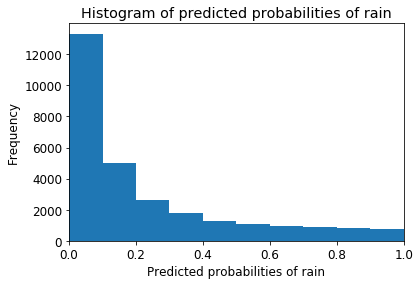

In [59]:
# plot histogram of predicted probabilities

# adjust the font size 
plt.rcParams['font.size'] = 12

# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)

# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of rain')

# set the x-axis limit
plt.xlim(0,1)

# set the title
plt.xlabel('Predicted probabilities of rain')
plt.ylabel('Frequency')

### Observations


- We can see that the above histogram is highly positive skewed.


- The first column tell us that there are approximately 15000 observations with probability between 0.0 and 0.1.


- There are small number of observations with probability > 0.5.


- So, these small number of observations predict that there will be rain tomorrow.


- Majority of observations predict that there will be no rain tomorrow.

### Lower the threshold

In [60]:
from sklearn.preprocessing import binarize

for i in range(1,5):   
    cm1=0
    
    y_pred1 = logreg.predict_proba(X_test)[:,1]   
    y_pred1 = y_pred1.reshape(-1,1)
    y_pred2 = binarize(y_pred1, i/10)   
    y_pred2 = np.where(y_pred2 == 1, 'Yes', 'No')   
    cm1 = confusion_matrix(y_test, y_pred2)
        
    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',
           
            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n', 
           
            cm1[0,1],'Type I errors( False Positives), ','\n\n',
           
            cm1[1,0],'Type II errors( False Negatives), ','\n\n',
           
           'Accuracy score: ', (accuracy_score(y_test, y_pred2)), '\n\n',
           
           'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',
           
           'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',
          
            '====================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is  

 [[12747  9320]
 [  548  5824]] 

 with 18571 correct predictions,  

 9320 Type I errors( False Positives),  

 548 Type II errors( False Negatives),  

 Accuracy score:  0.653011709272478 

 Sensitivity:  0.9139987445072191 

 Specificity:  0.5776498844428332 



With 0.2 threshold the Confusion Matrix is  

 [[17057  5010]
 [ 1241  5131]] 

 with 22188 correct predictions,  

 5010 Type I errors( False Positives),  

 1241 Type II errors( False Negatives),  

 Accuracy score:  0.7801962094307113 

 Sensitivity:  0.8052416823603264 

 Specificity:  0.7729641546200209 



With 0.3 threshold the Confusion Matrix is  

 [[19071  2996]
 [ 1864  4508]] 

 with 23579 correct predictions,  

 2996 Type I errors( False Positives),  

 1864 Type II errors( False Negatives),  

 Accuracy score:  0.8291079151868912 

 Sensitivity:  0.7074701820464532 

 Specificity:  0.8642316581320524 



With 0.4 threshold the Confusion Matrix is  

 [[20213  1854

### Comments


- In binary problems, the threshold of 0.5 is used by default to convert predicted probabilities into class predictions.


- Threshold can be adjusted to increase sensitivity or specificity. 


- Sensitivity and specificity have an inverse relationship. Increasing one would always decrease the other and vice versa.


- We can see that increasing the threshold level results in increased accuracy.


- Adjusting the threshold level should be one of the last step you do in the model-building process.

# **19. ROC - AUC** <a class="anchor" id="18"></a>


[Table of Contents](#0.1)



## ROC Curve


Another tool to measure the classification model performance visually is **ROC Curve**. ROC Curve stands for **Receiver Operating Characteristic Curve**. An **ROC Curve** is a plot which shows the performance of a classification model at various 
classification threshold levels. 



The **ROC Curve** plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various threshold levels.



**True Positive Rate (TPR)** is also called **Recall**. It is defined as the ratio of `TP to (TP + FN).`



**False Positive Rate (FPR)** is defined as the ratio of `FP to (FP + TN).`




In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).



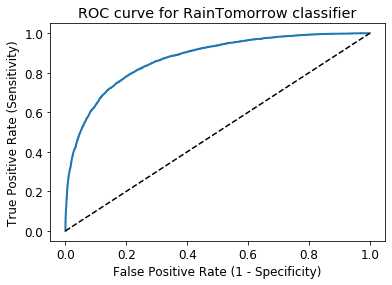

In [61]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'Yes')

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

ROC curve help us to choose a threshold level that balances sensitivity and specificity for a particular context.

## ROC-AUC


**ROC AUC** stands for **Receiver Operating Characteristic - Area Under Curve**. It is a technique to compare classifier performance. In this technique, we measure the `area under the curve (AUC)`. A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. 


So, **ROC AUC** is the percentage of the ROC plot that is underneath the curve.

In [62]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8729


### Comments


- ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

- ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will rain tomorrow or not.

In [63]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8694


# **20. k-Fold Cross Validation** <a class="anchor" id="19"></a>


[Table of Contents](#0.1)

In [64]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.84743528 0.84576502 0.84611665 0.84844622 0.84747253]


We can summarize the cross-validation accuracy by calculating its mean.

In [65]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8470


Our, original model score is found to be 0.8470. The average cross-validation score is 0.8470. So, we can conclude that cross-validation does not result in performance improvement.

# **21. Hyperparameter Optimization using GridSearch CV** <a class="anchor" id="20"></a>


[Table of Contents](#0.1)

In [66]:
from sklearn.model_selection import GridSearchCV

parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]

grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [67]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8472


Parameters that give the best results : 

 {'penalty': 'l1'}


Estimator that was chosen by the search : 

 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [68]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.8501


### Comments


- Our original model test accuracy is 0.8501 while GridSearch CV accuracy is 0.8507.


- We can see that GridSearch CV improve the performance for this particular model.

# **22. Results and conclusion** <a class="anchor" id="21"></a>


[Table of Contents](#0.1)

1.	The logistic regression model accuracy score is 0.8501. So, the model does a very good job in predicting whether or not it will rain tomorrow in Australia.

2.	Small number of observations predict that there will be rain tomorrow. Majority of observations predict that there will be no rain tomorrow.

3.	The model shows no signs of overfitting.

4.	Increasing the value of C results in higher test set accuracy and also a slightly increased training set accuracy. So, we can conclude that a more complex model should perform better.

5.	Increasing the threshold level results in increased accuracy.

6.	ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will rain tomorrow or not.

7.	Our original model accuracy score is 0.8501 whereas accuracy score after RFECV is 0.8500. So, we can obtain approximately similar accuracy but with reduced set of features.

8.	In the original model, we have FP = 1175 whereas FP1 = 1174. So, we get approximately same number of false positives. Also, FN = 3087 whereas FN1 = 3091. So, we get slighly higher false negatives.

9.	Our, original model score is found to be 0.8476. The average cross-validation score is 0.8474. So, we can conclude that cross-validation does not result in performance improvement.

10.	Our original model test accuracy is 0.8501 while GridSearch CV accuracy is 0.8507. We can see that GridSearch CV improve the performance for this particular model.
